# **Project Name**    - Adult Income Prediction



**Problem statement**:- In this project, I have the dataset that contains information about diffent people like age,education,occupation,and more. I want to use this data to predict whether the persons income is more than 50k per year or not.the problem iam trying to solve is to understand the factors that contribute to heigher or lower incomes and build a model that can predict income level accurately.

# **In this project, I have required to do**
1. Exploratory Data Analysis

2. Data Preprocessing

3. Model Selection and Training

4. Model Evaluation

5. Feature Importance and Analysis

6. Model Fine-tuning and Optimization

7. Predictions and Conclusion

## **Importing Libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# **Loading the Dataset**


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/adult.csv')

### **Data Exploration**

In [11]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [14]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

### **Data visualization**

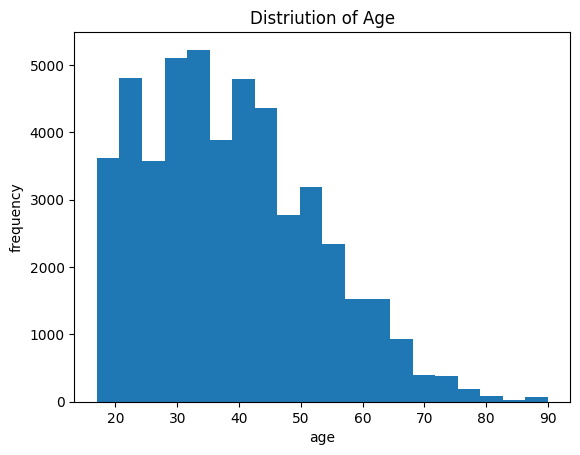

In [18]:
#ploting the histogram using "age" variable
plt.hist(df['age'], bins=20)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Distriution of Age')
plt.show()


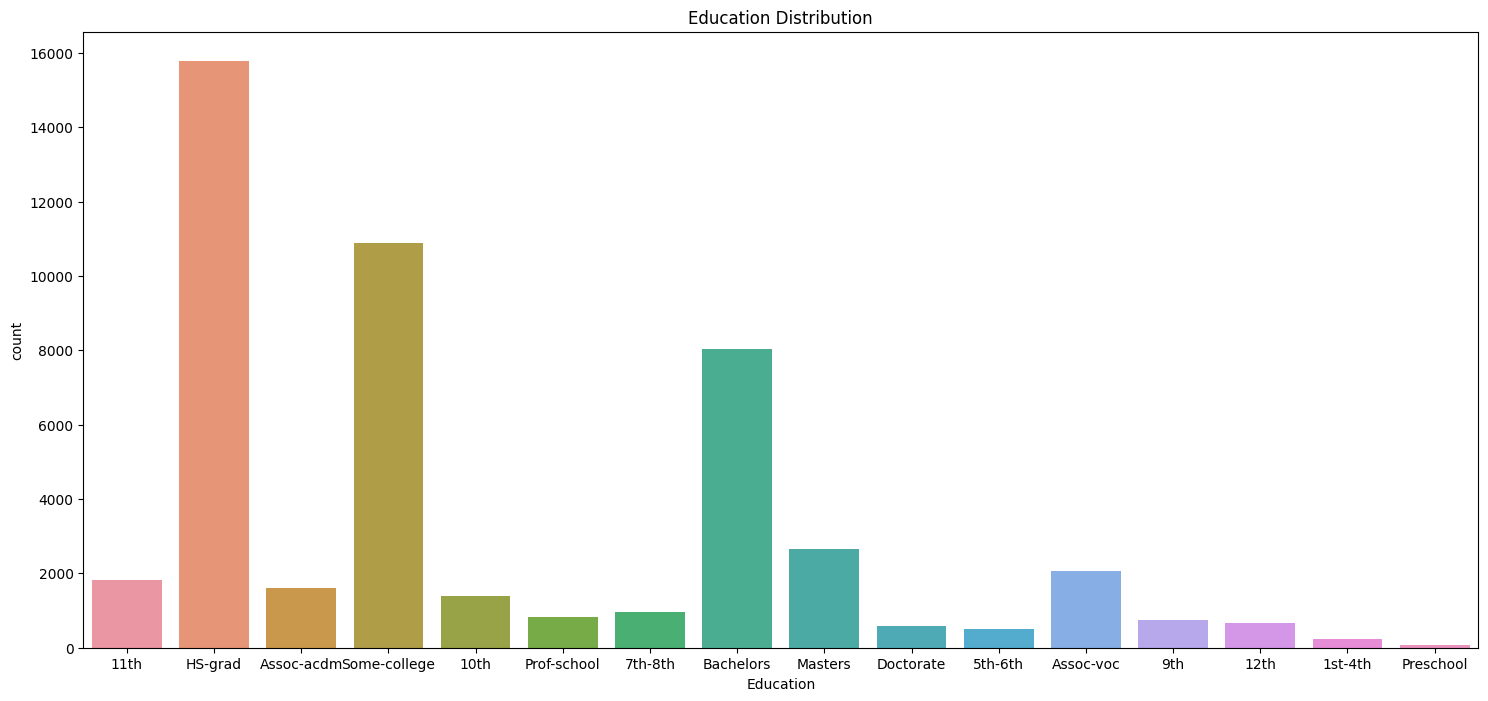

In [22]:
# Bar graph of "Education" variable
plt.figure(figsize=(18,8))
sns.countplot(x='education',data=df)
plt.xlabel('Education')
plt.ylabel('count')
plt.title('Education Distribution')
plt.show()

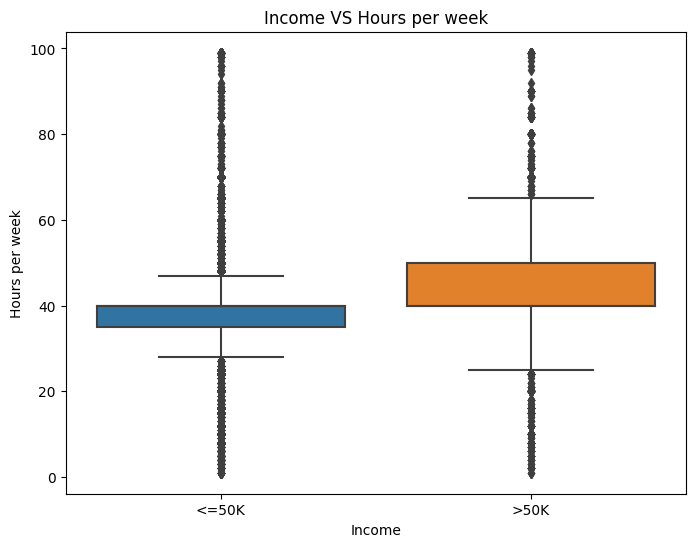

In [24]:
#create a box plot to visualize the relationship between 'income'and 'hours_per_week'
plt.figure(figsize=(8,6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.xlabel('Income')
plt.ylabel('Hours per week')
plt.title('Income VS Hours per week')
plt.show()


### **Data Preprocessing**

In [25]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [27]:
df= df.dropna()

In [29]:
df_encoded= pd.get_dummies(df, columns=['education'])